In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading Data Set

In [2]:
data = pd.read_csv('archive2/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data Exploration

In [3]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

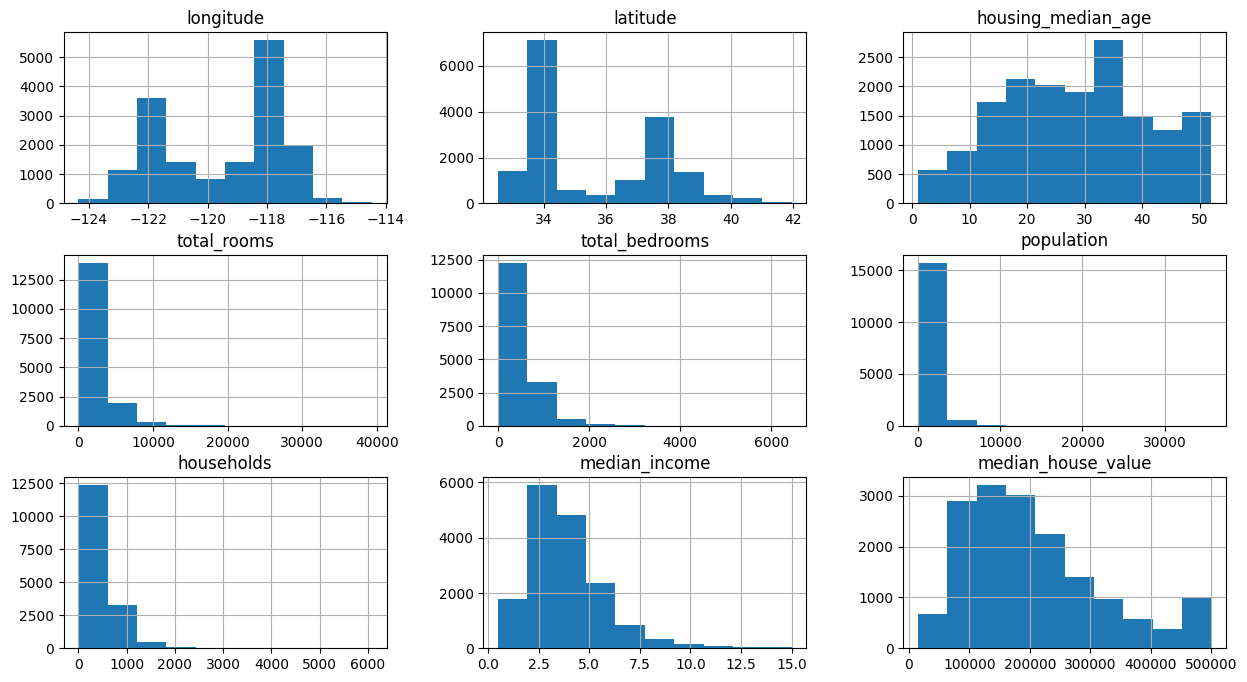

In [9]:
train_data.hist(figsize=(15,8))

In [10]:
numeric_train_data = train_data.select_dtypes(include=['number'])
correlation_matrix = numeric_train_data.corr()
print(correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924340           -0.106111     0.040173   
latitude            -0.924340  1.000000            0.009535    -0.033439   
housing_median_age  -0.106111  0.009535            1.000000    -0.359714   
total_rooms          0.040173 -0.033439           -0.359714     1.000000   
total_bedrooms       0.066871 -0.066337           -0.319073     0.929102   
population           0.094641 -0.106192           -0.291689     0.851704   
households           0.054023 -0.071678           -0.301818     0.916829   
median_income       -0.021911 -0.073213           -0.120550     0.202131   
median_house_value  -0.048166 -0.141933            0.104041     0.136040   

                    total_bedrooms  population  households  median_income  \
longitude                 0.066871    0.094641    0.054023      -0.021911   
latitude                 -0.066337   -0.106192   -0.071678      -0.073213   
housing_

In [11]:
numeric_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 17727 to 15948
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   median_house_value  16346 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


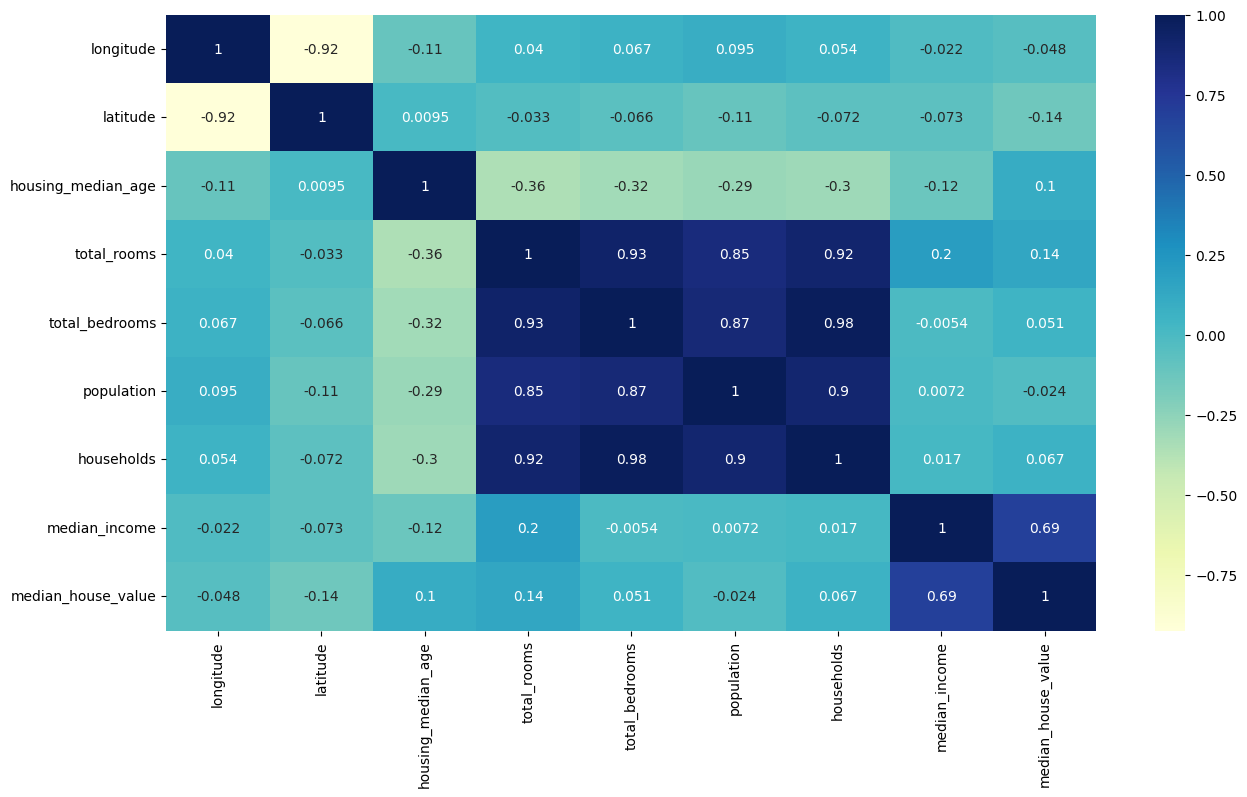

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True,cmap='YlGnBu')
plt.show()

Data Preprocessing

In [13]:
# these four were skewed, so to prevent this we have used natural log to prevent skewness.
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

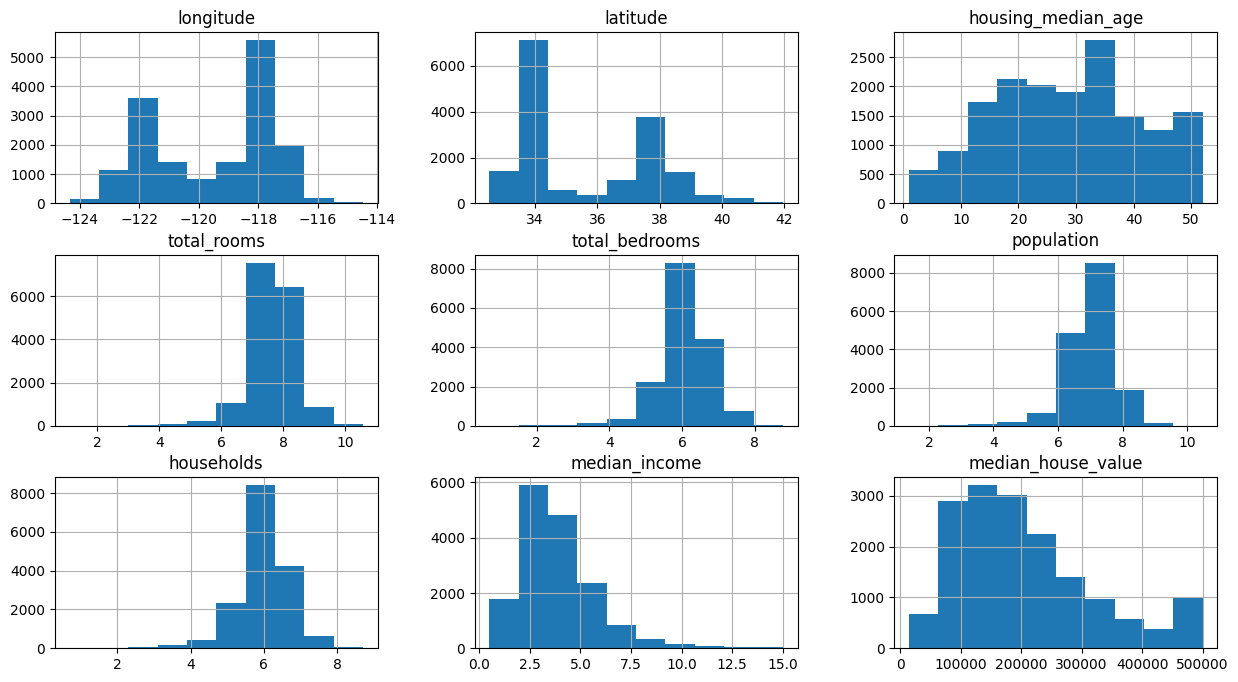

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
#here I assume that the house on coast(Near Bay) will be costlier rather than 
#the houses at far away from coast(Inland)

train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [16]:
# 1 for yes and 0 for no
# one-hot encoding
dummy_df = pd.get_dummies(train_data.ocean_proximity)
dummy_df = dummy_df.astype(int)
dummy_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,1,0,0,0,0
2057,0,1,0,0,0
6453,0,1,0,0,0
4619,1,0,0,0,0
15266,0,0,0,0,1
...,...,...,...,...,...
11397,1,0,0,0,0
12081,1,0,0,0,0
5447,1,0,0,0,0
866,0,0,0,1,0


In [17]:
train_data = train_data.join(dummy_df)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,<1H OCEAN,227600.0,1,0,0,0,0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,INLAND,110400.0,0,1,0,0,0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,INLAND,248100.0,0,1,0,0,0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,<1H OCEAN,305600.0,1,0,0,0,0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,NEAR OCEAN,214600.0,0,0,0,0,1


In [18]:
#removing ocean_proximity column from the table
train_data = train_data.drop(['ocean_proximity'], axis=1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,1,0,0,0,0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0,1,0,0,0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0,1,0,0,0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,0,1


In [19]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,1,0,0,0,0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0,1,0,0,0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0,1,0,0,0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


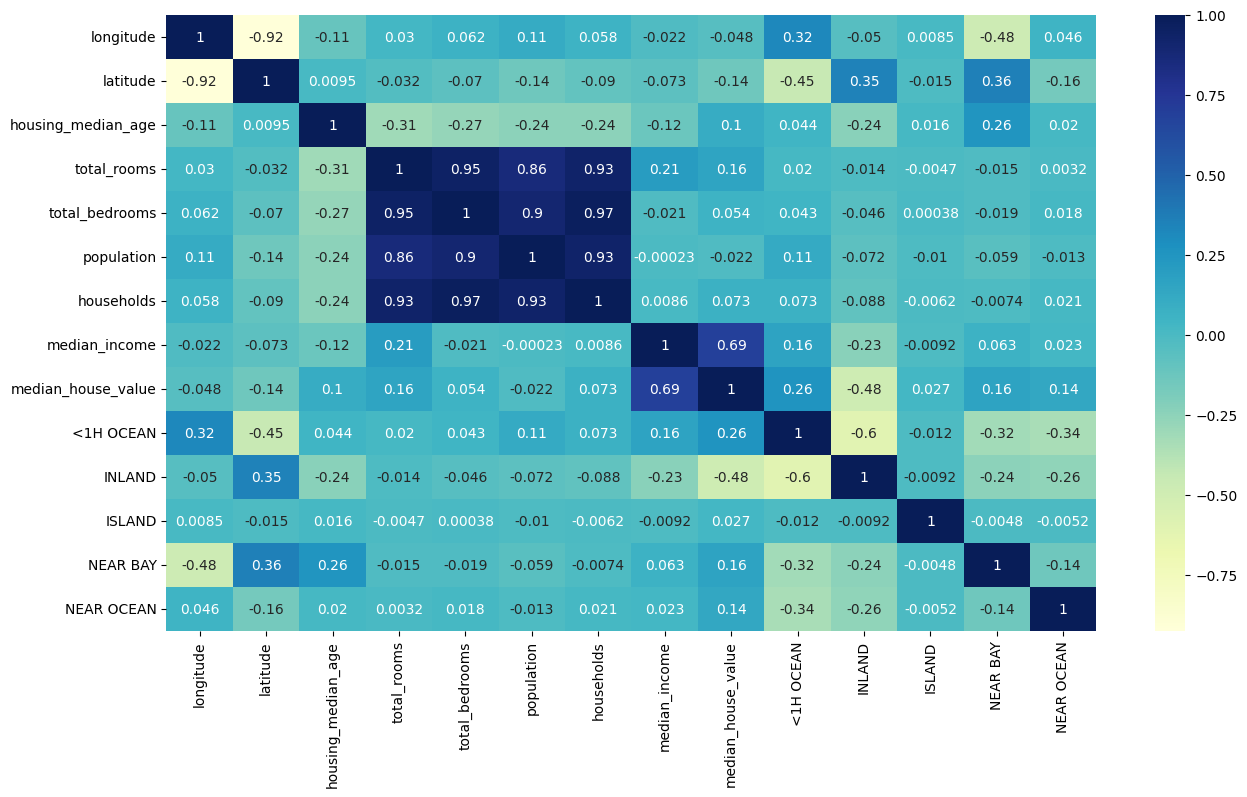

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap='YlGnBu')
plt.show()

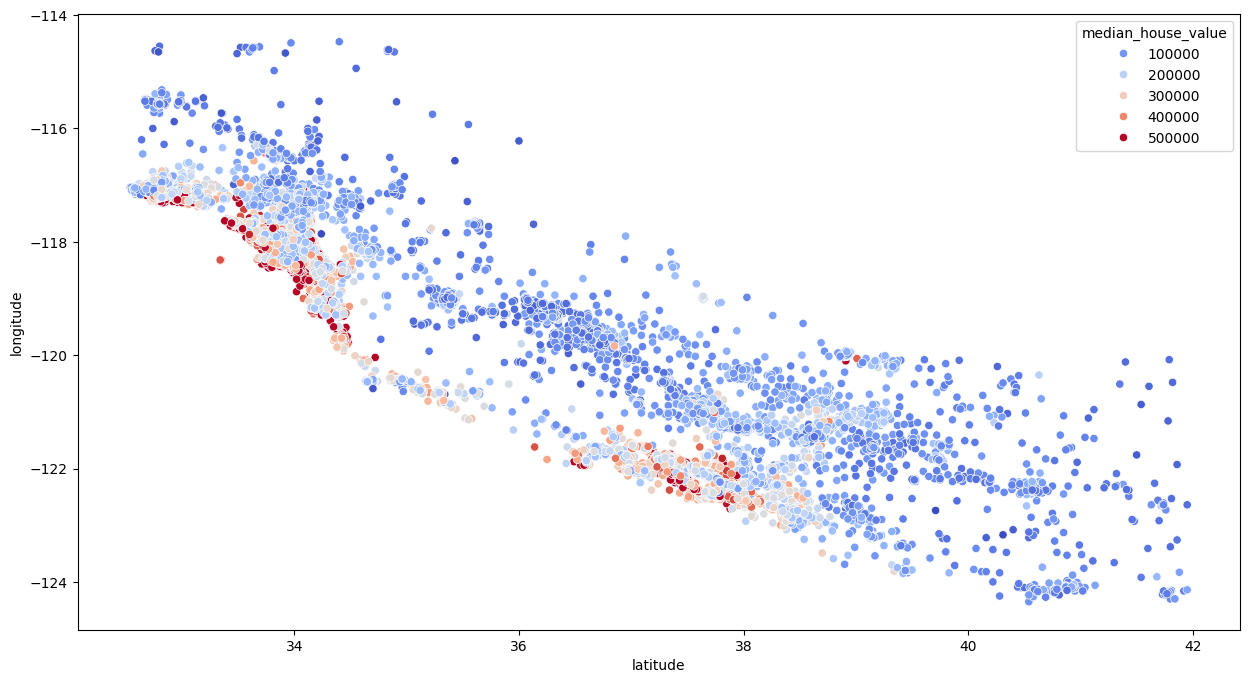

In [21]:
# we are going to look how positions influence the Median_house_values i.e. latitude, and longitude
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude',y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')
plt.show()

Feature Engineering

In [22]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_room'] = train_data['households']/train_data['total_rooms']

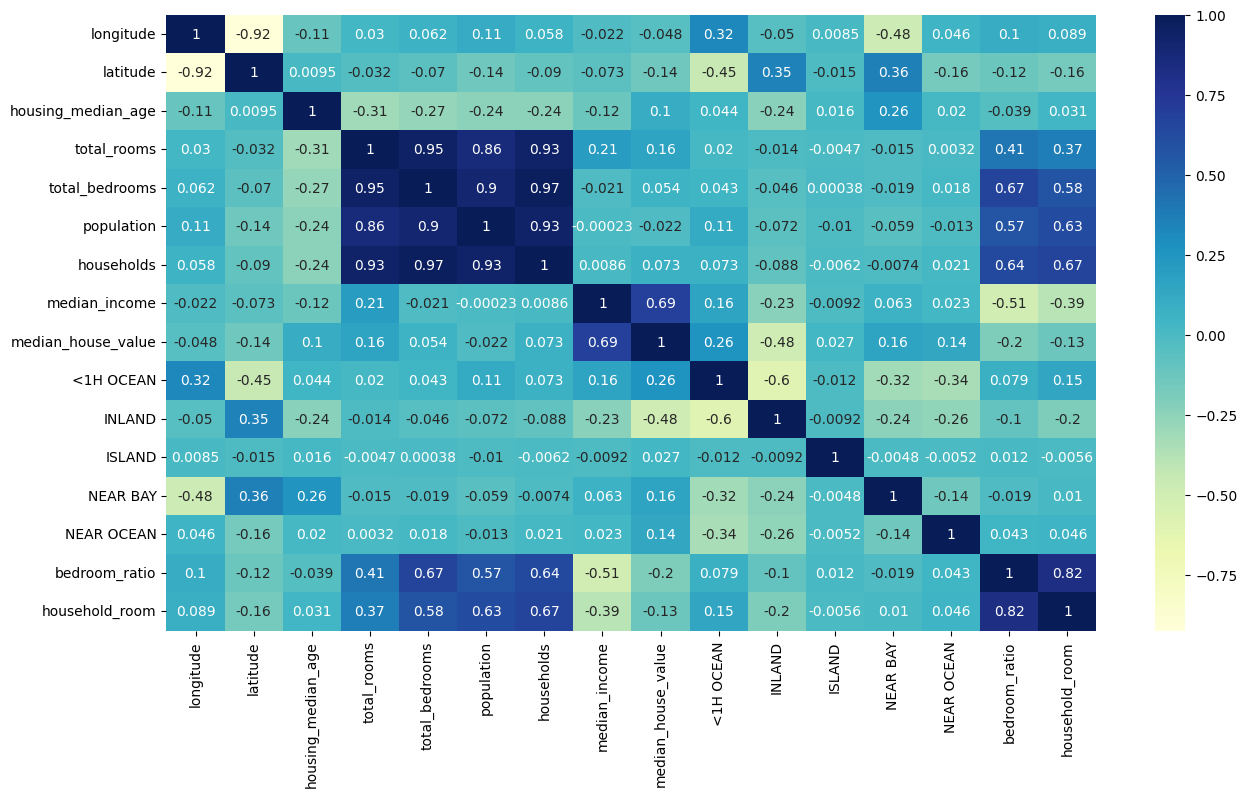

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap='YlGnBu')
plt.show()

Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [25]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

dummy_df2 = pd.get_dummies(test_data.ocean_proximity)
dummy_df2 = dummy_df2.astype(int)

test_data = test_data.join(dummy_df2)
test_data = test_data.drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_room'] = test_data['households']/test_data['total_rooms']

In [26]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [27]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'bedroom_ratio', 'household_room'],
      dtype='object')

In [28]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'bedroom_ratio', 'household_room'],
      dtype='object')

In [29]:
modelScore = reg.score(X_test, y_test)
modelScore

0.6684829798270058

In [30]:
y_pred = reg.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4533555184.517848


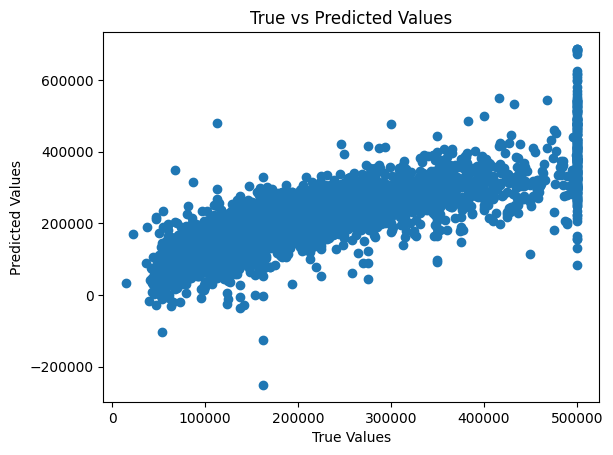

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

Random Forest 

In [33]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
forest.score(X_test, y_test)

0.8210133629315445

In [35]:
#Pickling of Linear Regression Model

import pickle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

pickle.dump(reg, open('regmodel.pkl', 'wb'))

In [36]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [37]:
y_pred_after_pickling = pickled_model.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred_after_pickling)
print("Mean Squared Error:", mse)

Mean Squared Error: 4533555184.517848


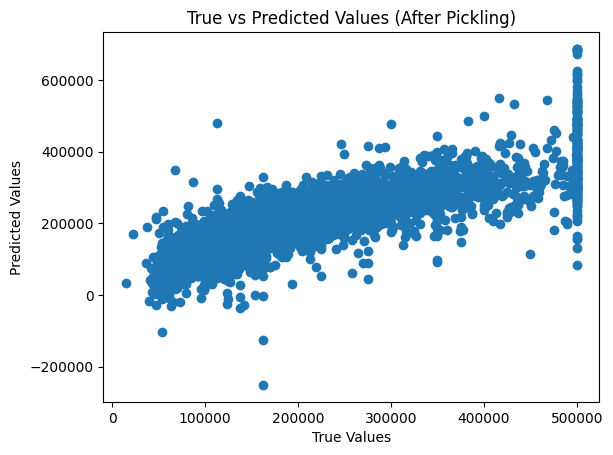

In [39]:
plt.scatter(y_test, y_pred_after_pickling)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (After Pickling)')
plt.show()